## Timeseries Analysis, Decomposition and Forecasting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
electricity_df = pd.read_csv(
    "../Data/powerconsumption.csv",
    index_col=['Datetime'],
    parse_dates=['Datetime']
).resample("h").mean()

electricity_df.index.to_series().describe()

count                   8736
mean     2017-07-01 23:30:00
min      2017-01-01 00:00:00
25%      2017-04-01 23:45:00
50%      2017-07-01 23:30:00
75%      2017-09-30 23:15:00
max      2017-12-30 23:00:00
Name: Datetime, dtype: object

### 1. Timeseries Analysis

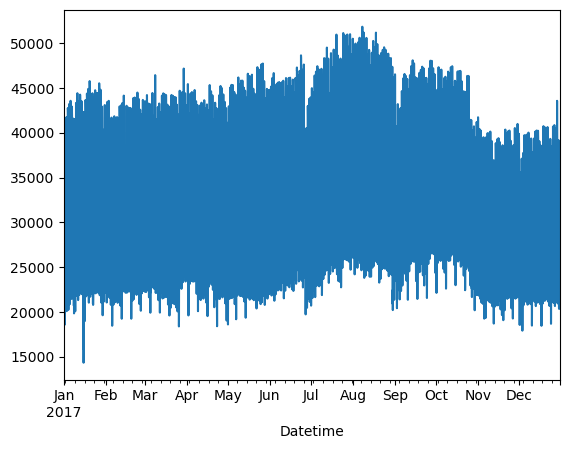

In [3]:
electricity_df["PowerConsumption_Zone1"].plot();

### 2. Decomposition

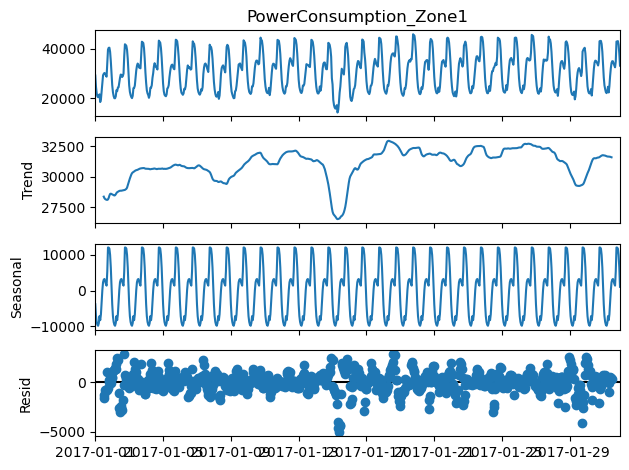

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(electricity_df["PowerConsumption_Zone1"].iloc[:744],period=24)

result.plot();

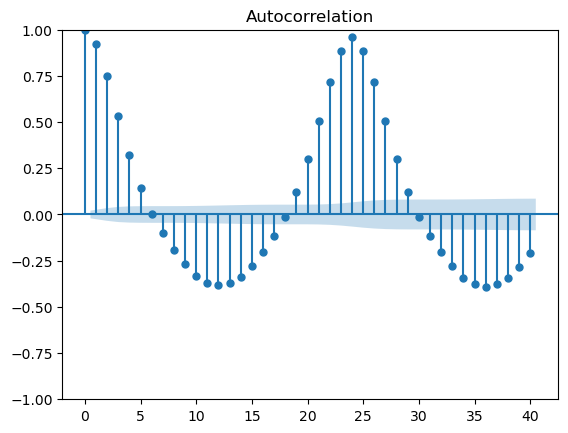

In [5]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(electricity_df["PowerConsumption_Zone1"]);

### 3. Linear Regression

In [6]:
electricity_df = electricity_df["PowerConsumption_Zone1"].reset_index()

In [7]:
electricity_df = electricity_df.assign(
    trend = electricity_df.index,
    hour = electricity_df["Datetime"].dt.hour.astype("string")
).set_index("Datetime")

In [8]:
electricity_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8736 entries, 2017-01-01 00:00:00 to 2017-12-30 23:00:00
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PowerConsumption_Zone1  8736 non-null   float64
 1   trend                   8736 non-null   int64  
 2   hour                    8736 non-null   string 
dtypes: float64(1), int64(1), string(1)
memory usage: 273.0 KB


In [9]:
electricity_df = pd.get_dummies(
    electricity_df,
    drop_first=True,
    dtype="int"
)

In [10]:
electricity_df.head()

,PowerConsumption_Zone1,trend,hour_1,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,...,hour_21,hour_22,hour_23,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9
Datetime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,29197.974683,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-01-01 01:00:00,24657.215190,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-01-01 02:00:00,22083.037973,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-01-01 03:00:00,20811.139240,3,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2017-01-01 04:00:00,20475.949367,4,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
#Forecast power consumption for the first 3 days of Feb based on 
#the trend in Jan
electricity_train = electricity_df[:"2017-01-31"]
electricity_test = electricity_df["2017-02-01":"2017-02-03"]


In [12]:
import statsmodels.api as sm

X_train = sm.add_constant(electricity_train.drop("PowerConsumption_Zone1",axis=1))
y_train = electricity_train["PowerConsumption_Zone1"]

X_test = sm.add_constant(electricity_test.drop("PowerConsumption_Zone1", axis=1))
y_test = electricity_test["PowerConsumption_Zone1"]


In [13]:
model = sm.OLS(y_train,X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     PowerConsumption_Zone1   R-squared:                       0.951
Model:                                OLS   Adj. R-squared:                  0.949
Method:                     Least Squares   F-statistic:                     577.4
Date:                    Sun, 13 Jul 2025   Prob (F-statistic):               0.00
Time:                            19:45:32   Log-Likelihood:                -6558.4
No. Observations:                     744   AIC:                         1.317e+04
Df Residuals:                         719   BIC:                         1.328e+04
Df Model:                              24                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.634e+04    314.697     83.687      0.000    2.57e+04     2.7e+04
trend          2.7642      0.283      9.763      0.000       2.208       3.320
hour_1     -3371.1268    421.061     -8.006      0.000   -4197.783   -2544.471
hour_10     3722.1664    421.070      8.840      0.000    2895.492    4548.841
hour_11     5958.7162    421.072     14.151      0.000    5132.038    6785.394
hour_12     6754.9721    421.075     16.042      0.000    5928.290    7581.655
hour_13     6920.6359    421.077     16.436      0.000    6093.949    7747.323
hour_14     6197.7084    421.079     14.719      0.000    5371.016    7024.401
hour_15     5565.0054    421.082     13.216      0.000    4738.308    6391.703
hour_16     5048.1049    421.085     11.988      0.000    4221.401    5874.808
hour_17     8939.2729    421.088     21.229      0.000    8112.563    9765.983
hour_18      1.57e+04    421.092     37.293      0.000    1.49e+04    1.65e+04
hour_19     1.567e+04    421.095     37.206      0.000    1.48e+04    1.65e+04
hour_2     -5008.9746    421.061    -11.896      0.000   -5835.631   -4182.318
hour_20     1.541e+04    421.099     36.587      0.000    1.46e+04    1.62e+04
hour_21     1.365e+04    421.103     32.405      0.000    1.28e+04    1.45e+04
hour_22     1.012e+04    421.107     24.041      0.000    9297.105     1.1e+04
hour_23     4757.7226    421.111     11.298      0.000    3930.968    5584.477
hour_3     -5816.3121    421.062    -13.813      0.000   -6642.969   -4989.655
hour_4     -6086.6794    421.062    -14.456      0.000   -6913.338   -5260.021
hour_5     -5378.3288    421.063    -12.773      0.000   -6204.989   -4551.669
hour_6     -3451.3910    421.064     -8.197      0.000   -4278.053   -2624.729
hour_7     -4639.4880    421.065    -11.018      0.000   -5466.153   -3812.823
hour_8     -3015.4331    421.067     -7.161      0.000   -3842.101   -2188.765
hour_9       422.0968    421.069      1.002      0.316    -404.574    1248.768
==============================================================================
Omnibus:                      300.491   Durbin-Watson:                   0.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1597.209
Skew:                          -1.762   Prob(JB):                         0.00
Kurtosis:                       9.254   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mpe

print(f'Mean Absolute Error: {mae(y_test,y_pred)}')
print(f'Mean Absolute Pct. Error: {mpe(y_test, y_pred)}')

Mean Absolute Error: 1016.8138495938614
Mean Absolute Pct. Error: 0.03272545074532786


#### Linear Regression using Scikit-learn

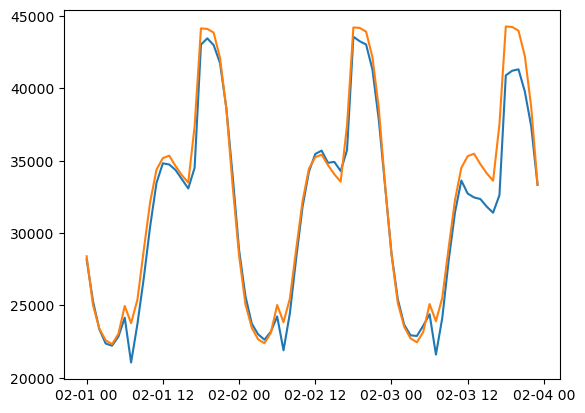

In [16]:
figure, ax = plt.subplots()

ax.plot(electricity_test.index,electricity_test["PowerConsumption_Zone1"])
ax.plot(electricity_test.index, y_pred)
plt.show();

In [17]:
from sklearn.linear_model import LinearRegression

model_skl = LinearRegression().fit(X_train,y_train)
print(f'R2 score on Train: {model_skl.score(X_train,y_train)}')
print(f'R2 score on Test: {model_skl.score(X_test,y_test)}')


R2 score on Train: 0.9506705677174466
R2 score on Test: 0.9557613462529654


In [18]:
y_skl_pred = model_skl.predict(X_test)

In [19]:
print(f'Mean Absolute Error: {mae(y_test,y_skl_pred)}')
print(f'Mean Absolute Pct. Error: {mpe(y_test, y_skl_pred)}')

Mean Absolute Error: 1016.813849607753
Mean Absolute Pct. Error: 0.03272545074573845


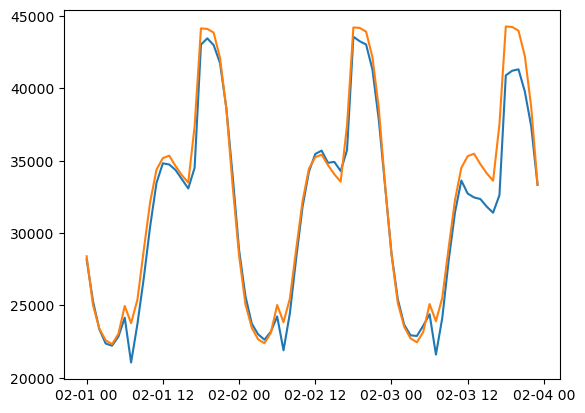

In [20]:
figure, ax = plt.subplots()

ax.plot(electricity_test.index,electricity_test["PowerConsumption_Zone1"])
ax.plot(electricity_test.index, y_skl_pred)
plt.show();

### 4. Facebook Prophet Model

In [21]:
electricity_df = (
    pd.read_csv(
            "../Data/powerconsumption.csv",
            usecols=["PowerConsumption_Zone1","Datetime"],
            parse_dates=['Datetime']
    ).rename({"Datetime":"ds","PowerConsumption_Zone1":"y"},axis=1)
)

electricity_df.head()

,ds,y
0,2017-01-01 00:00:00,34055.69620
1,2017-01-01 00:10:00,29814.68354
2,2017-01-01 00:20:00,29128.10127
3,2017-01-01 00:30:00,28228.86076
4,2017-01-01 00:40:00,27335.69620


In [22]:
electricity_train = electricity_df.query("ds < '2017-02-01'")
electricity_test = electricity_df.query("'2017-02-01' <= ds <'2017-02-04'")

In [24]:
from prophet import Prophet

m = Prophet() # seasonality_mode = 'additive'
m.fit(electricity_train[["ds","y"]]);

19:45:33 - cmdstanpy - INFO - Chain [1] start processing
19:45:34 - cmdstanpy - INFO - Chain [1] done processing


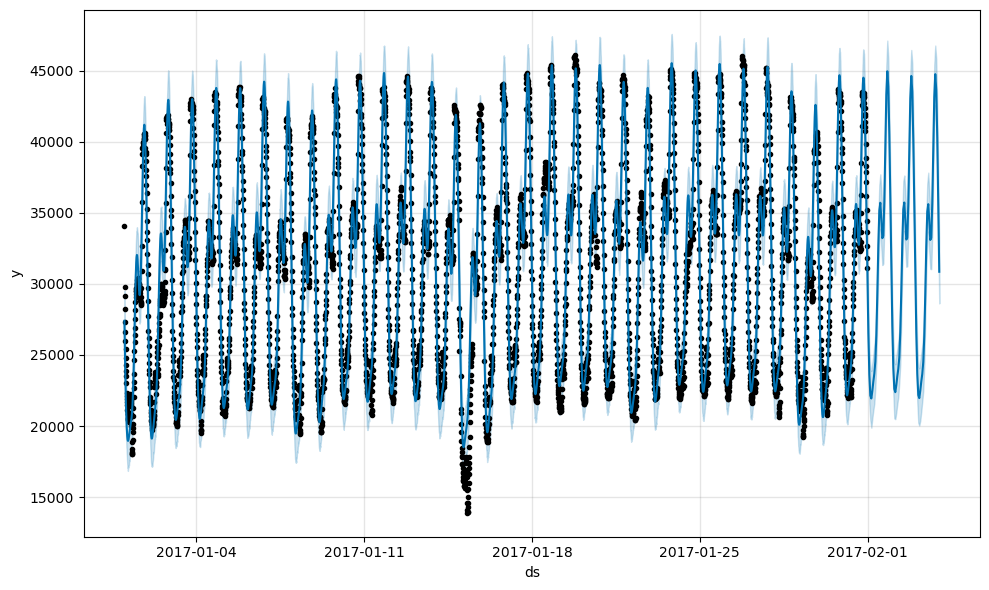

In [25]:
future = m.make_future_dataframe(periods=72, freq="h")

forecast = m.predict(future)

m.plot(forecast);

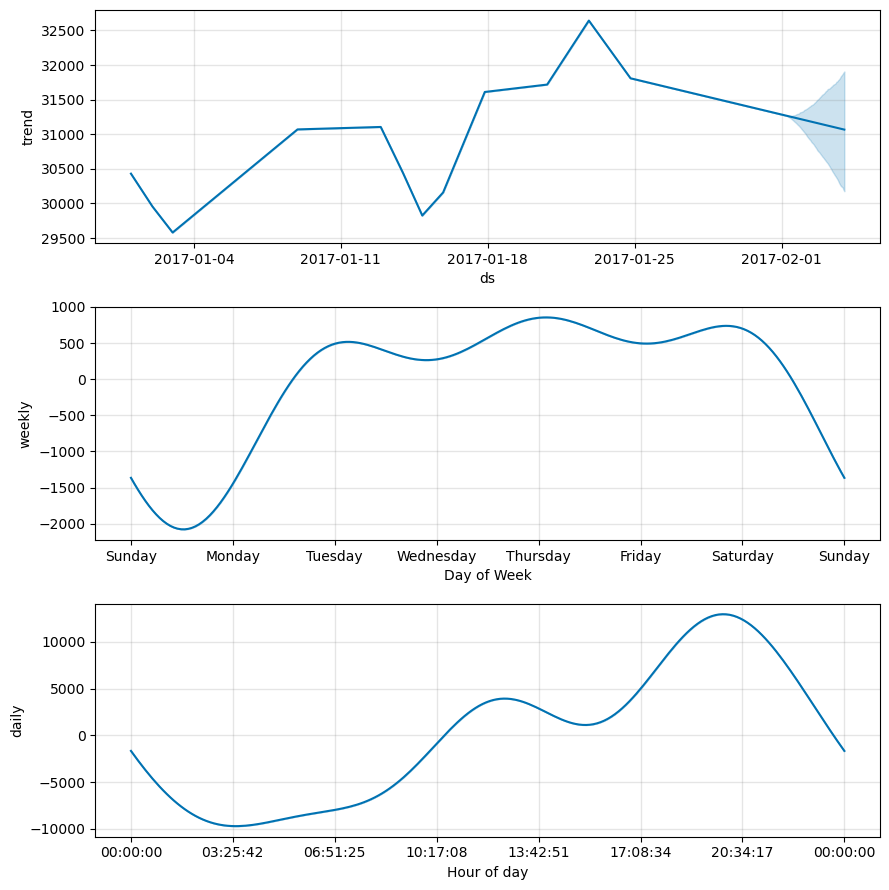

In [26]:
fig = m.plot_components(forecast)

In [30]:
forecast_subset = forecast.loc[:, ["ds", "yhat"]].rename(columns={"yhat": "predictions"})

# Merge on 'ds'
electricity_score = (
    pd.merge(electricity_test, forecast_subset, on="ds", how="inner")
    .set_index("ds")
    .loc[:, ["y", "predictions"]]
)

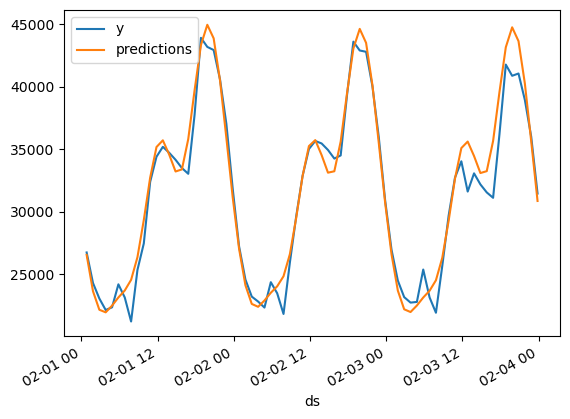

In [35]:
electricity_score.plot();

In [43]:
#Get predictions from Prophet
forecast_test = m.predict(electricity_test)

# Compute errors based on true and predicted y values
y_true = electricity_test["y"].values
y_pred = forecast_test["yhat"].values

print(f"MAPE: {mpe(y_true, y_pred)}")
print(f"MAE: {mae(y_true, y_pred)}")

MAPE: 0.036574674951872485
MAE: 1110.8571913894793
